## **IMPORTS AND SETTINGS**

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

sns.set_theme(style='darkgrid')

In [37]:
DATA_PATHES = ["./data/sinfrequency50Mhz.txt"]
DATA_NAMES = [50]
COLORS = ["pink", "orange", "lime", "indigo", "blue"][::-1]

## **GET DATA FROM FILES**

In [38]:
df = [[] for _ in range(len(DATA_PATHES))]
data_new = [np.genfromtxt(x, delimiter='\n', skip_header=1, dtype=np.int32)[1:] for x in DATA_PATHES]
for counter, x in enumerate(DATA_PATHES):
    df[counter] = pd.DataFrame({'col1': DATA_NAMES[counter], 
                                'col2': filter(lambda x: True if (x>999000 and x<1001000) else False, data_new[counter])})
df_all = pd.concat(df).reset_index(drop=True)

## **CHECK INCOMING DATA**

In [39]:
max_data = max([max(x) for x in data_new])
min_data = min([min(x) for x in data_new])
min_data, max_data

(982860, 1017820)

In [40]:
len(df[0])

48602

In [41]:
data_new[0]
np.std(data_new[0])

1151.1890530809012

## **PLOT DENSITY HIST**

99


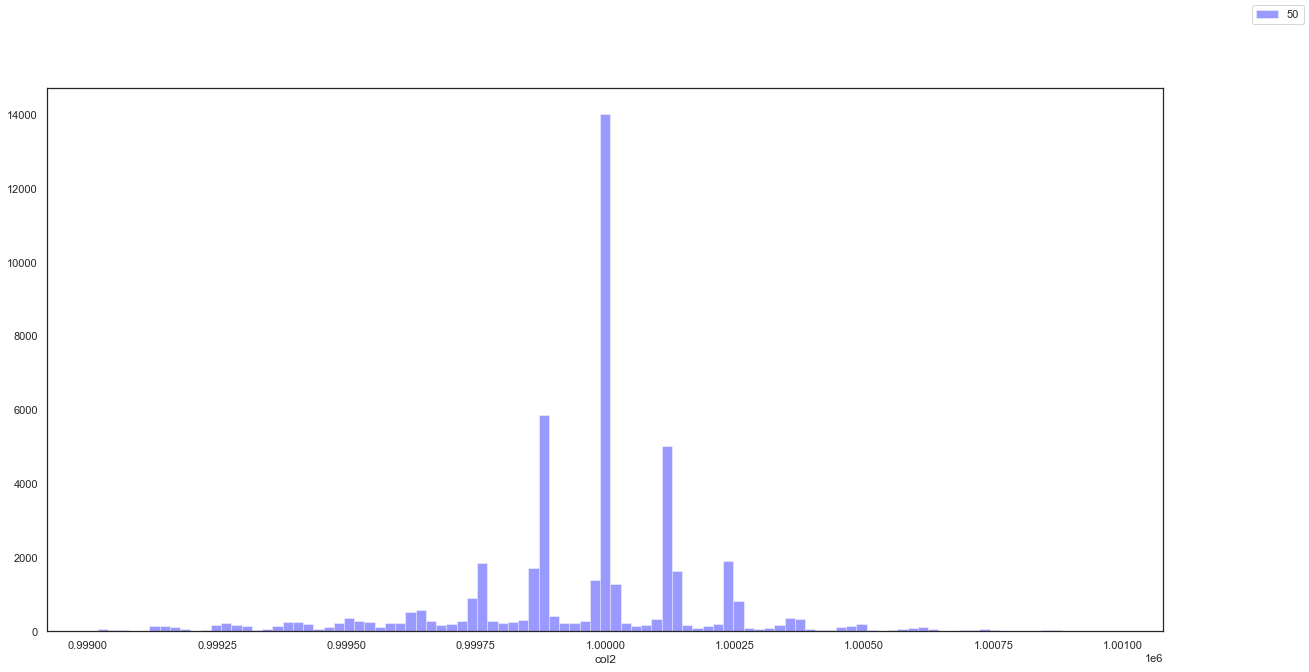

In [42]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

fig = plt.figure(figsize=(20,10))
for counter, col_id in enumerate(df_all["col1"].drop_duplicates()):
    data = df_all[df_all.col1 == col_id]["col2"]
    bins = len(df_all[df_all.col1 == col_id]["col2"].unique())
    print(bins)
    sns.distplot(df_all[df_all.col1 == col_id]["col2"], bins=bins, color=f"{COLORS[counter]}", kde=False);
    fig.legend(labels=DATA_NAMES)
    plt.show()